In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

import skeletor as sk

from skeletor.data import loadTestDataset, TEST_DATASETS_2D, TEST_DATASETS_3D
from skeletor.skeleton import skeletonize_medialThinning
from skeletor.utils import plotSpatialGraph

import time
from tqdm import tqdm

(2935, 2)


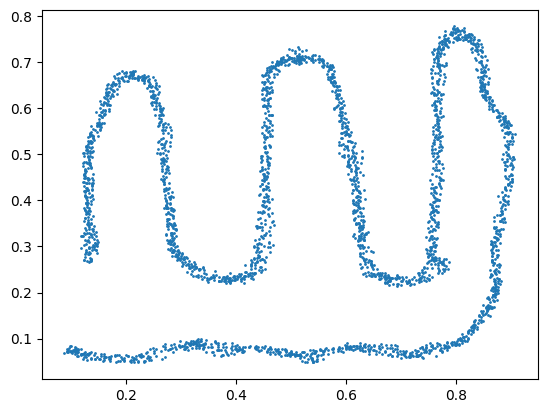

In [2]:
points = loadTestDataset('2d_curve_1', extraNoise=.01)

print(points.shape)

fig = plt.figure()
ax = fig.add_subplot(projection='3d' if points.shape[-1] == 3 else None)

ax.scatter(*points.T, s=1)
plt.show()

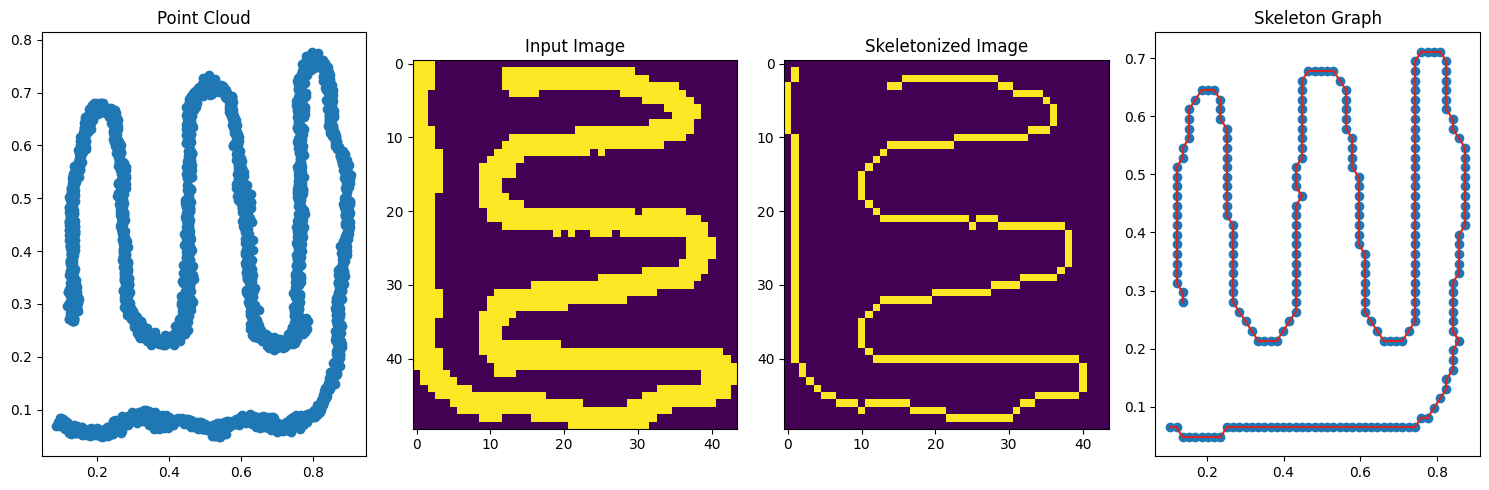

In [6]:
skelPoints, adjMat = skeletonize_medialThinning(points,
                                                imageMaxDim=50,
                                                kernelSize=3,
                                                minPointsPerPixel=10,
                                                debug=True)

# sk.plotSpatialGraph(skelPoints, adjMat, lineKwargs={'linewidth':.5, 'c':'tab:red'})
# plt.show()

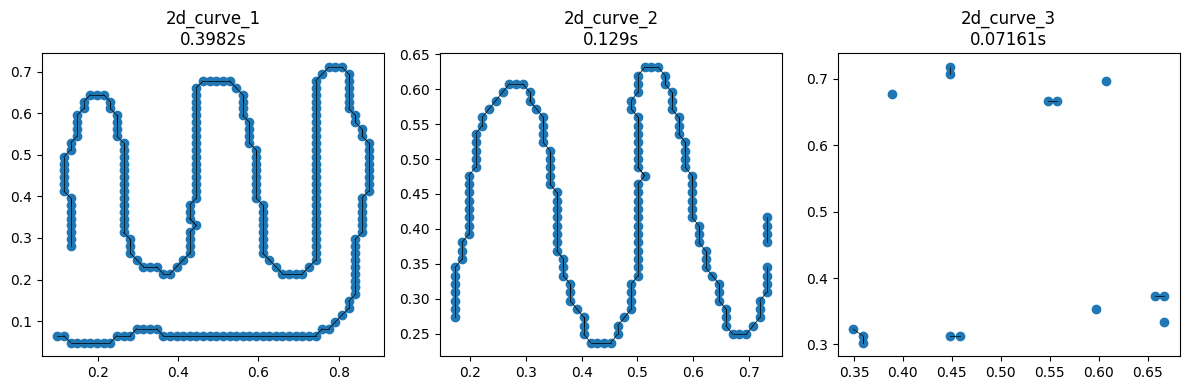

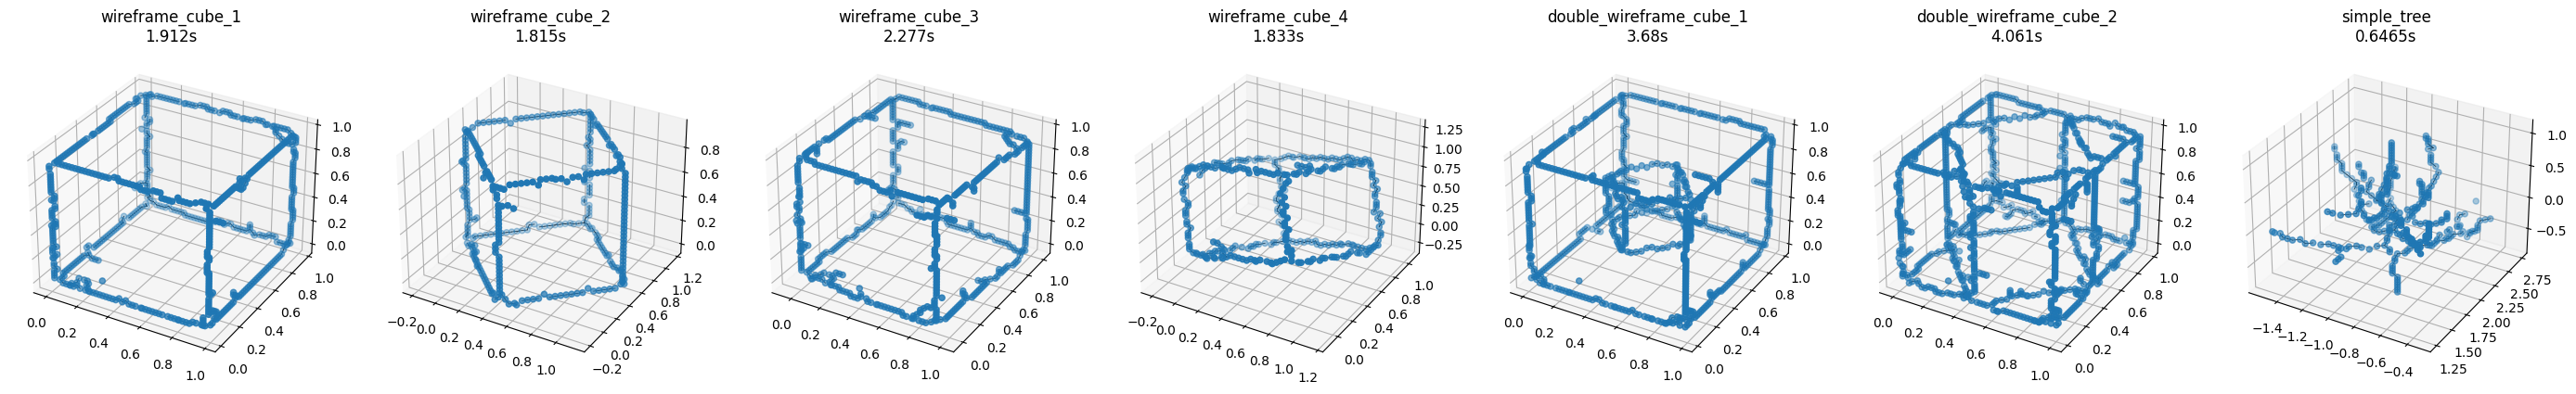

In [14]:

fig = plt.figure(figsize=(len(TEST_DATASETS_2D)*4,4))
for i, dataset in enumerate(TEST_DATASETS_2D):
    points = loadTestDataset(dataset, extraNoise=.01)
    startTime = time.perf_counter()
    ax = fig.add_subplot(1, len(TEST_DATASETS_2D), i+1)
    
    skelPoints, adjMat = skeletonize_medialThinning(points,
                                                    imageMaxDim=50,
                                                    kernelSize=3,
                                                    minPointsPerPixel=10,
                                                    debug=False)
    
    plotSpatialGraph(skelPoints, adjMat, ax=ax, lineKwargs={'linewidth':.5, 'c':'black'})
    ax.set_title(f'{dataset}\n{(time.perf_counter() - startTime):.4}s')
    
fig.tight_layout()    
plt.show()

fig = plt.figure(figsize=(len(TEST_DATASETS_3D)*4,4))
for i, dataset in enumerate(TEST_DATASETS_3D):
    points = loadTestDataset(dataset, extraNoise=.01)
    startTime = time.perf_counter()
    ax = fig.add_subplot(1, len(TEST_DATASETS_3D), i+1, projection='3d')
    
    skelPoints, adjMat = skeletonize_medialThinning(points,
                                                    imageMaxDim=50,
                                                    kernelSize=3,
                                                    minPointsPerPixel=1,
                                                    debug=False)
    
    plotSpatialGraph(skelPoints, adjMat, ax=ax, lineKwargs={'linewidth':.5, 'c':'black'})
    ax.set_title(f'{dataset}\n{(time.perf_counter() - startTime):.4}s')
    
fig.tight_layout()    
plt.show()


## Parameter Tests

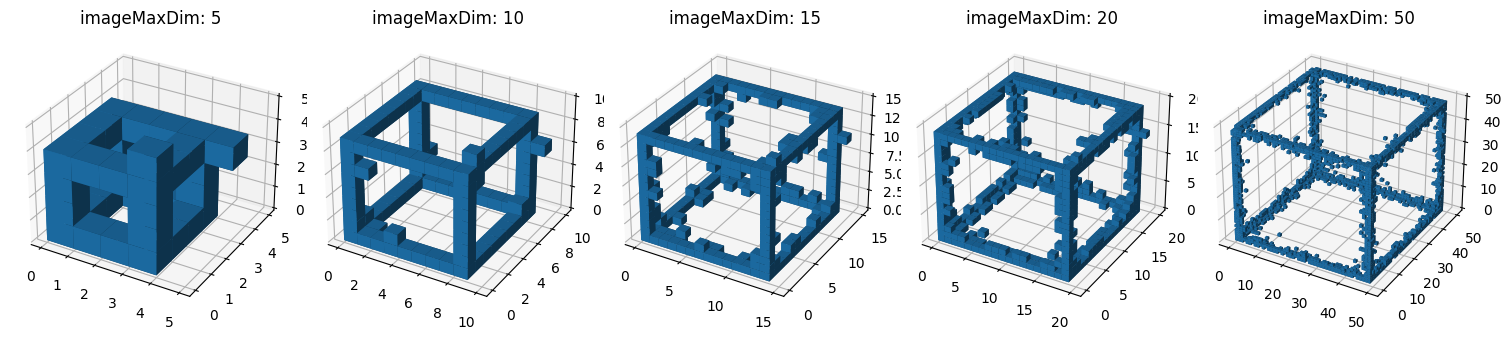

In [3]:
sizeArr = [5, 10, 15, 20, 50]
fig = plt.figure(figsize=(len(sizeArr)*3, 4))

for i in range(len(sizeArr)):
    
    img = sk.utils.pointsToImage(points, np.repeat(sizeArr[i], 3))
    
    ax = fig.add_subplot(1, len(sizeArr), i+1, projection='3d')
    ax.voxels(img)
    ax.set_title(f'imageMaxDim: {sizeArr[i]}')
    
fig.tight_layout()
plt.show()

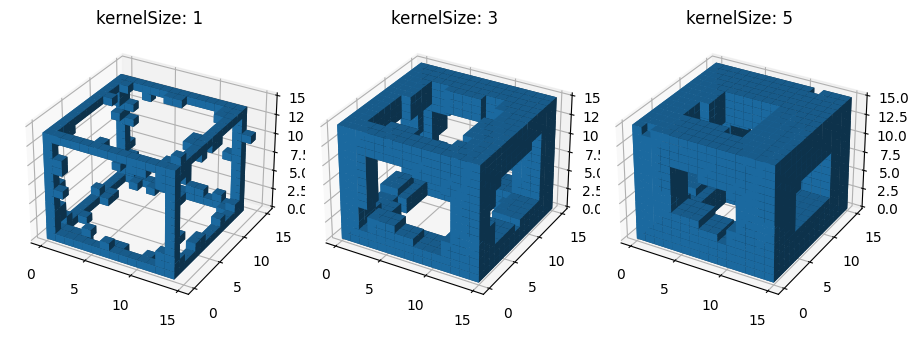

In [4]:
kernelArr = [1, 3, 5]
imageMaxSize = 15
fig = plt.figure(figsize=(len(kernelArr)*3, 4))

for i in range(len(kernelArr)):
    
    img = sk.utils.pointsToImage(points, np.repeat(imageMaxSize, 3), kernelArr[i])
    
    ax = fig.add_subplot(1, len(kernelArr), i+1, projection='3d')
    ax.voxels(img)
    ax.set_title(f'kernelSize: {kernelArr[i]}')
fig.tight_layout()
plt.show()

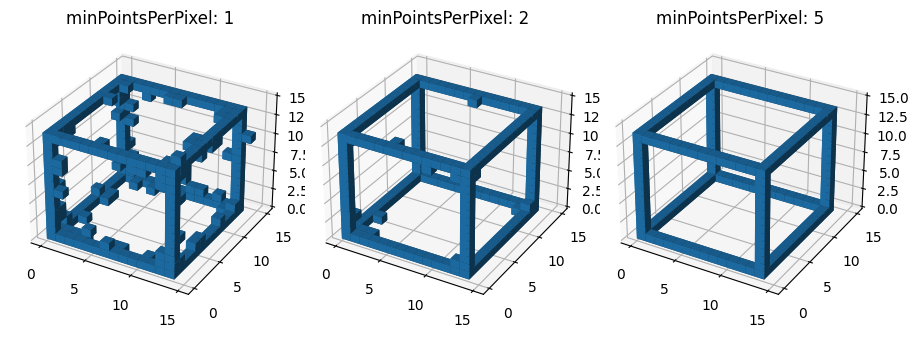

In [6]:
minPointsArr = [1, 2, 5]
imageMaxSize = 15
fig = plt.figure(figsize=(len(minPointsArr)*3, 4))

for i in range(len(minPointsArr)):
    
    img = sk.utils.pointsToImage(points, np.repeat(imageMaxSize, 3), 1, minPointsArr[i])
    
    ax = fig.add_subplot(1, len(minPointsArr), i+1, projection='3d')
    ax.voxels(img)
    ax.set_title(f'minPointsPerPixel: {minPointsArr[i]}')
    
fig.tight_layout()
plt.show()